##  Italian Data

In [1]:
from dataset import Dataset_From_Files
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ds = Dataset_From_Files(emb_file="./data_files/camera18_embedding.csv",
                            label_file="./data_files/camera18_node_labels.csv")
    
ds.dataset_vi(max_iter=0)




reversed_labels: False


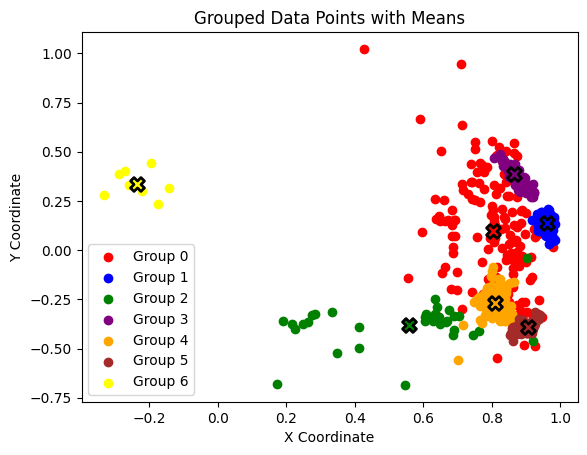

In [6]:
group_collection = [[] for _ in range(ds.K)]

for i, z_var in enumerate(ds.z_vars):
    normed_embd = ds.normed_embds[i]
    group = np.argmax(z_var.probs)
    r_i_moment = ds.r_vars[i].first_moment
    points_vec = normed_embd * r_i_moment
    points_vec = np.squeeze(points_vec)
    group_collection[group].append(points_vec)

    # Remove the middle dimension from each array in points_vec

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'yellow']  # Extend this list if more groups are present
fig, ax = plt.subplots()

# Plot each group
for i, (group_points, mean) in enumerate(zip(group_collection, ds.means_vars)):
    if group_points:  # Check if the list is not empty
        group_points = np.array(group_points)
        x_points = group_points[:, 0]
        y_points = group_points[:, 1]
        ax.scatter(x=x_points, y=y_points, color=colors[i % len(colors)], label=f'Group {i}')

    # Plot mean for each group
    mean_point = mean.mean
    ax.scatter(x=mean_point[0], y=mean_point[1], color=colors[i % len(colors)], edgecolor='k', s=100, marker='X', linewidths=2)

ax.legend()
plt.title('Grouped Data Points with Means')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# for i, (group_points, mean) in enumerate(zip(group_collection, ds.means_vars)):


# x_points = points_vec[:, 0]
# y_points = points_vec[:, 1]

# plt.scatter(x=x_points, y=y_points)

# mean_1 = ds.means_vars[0].mean
# mean_2 = ds.means_vars[1].mean

# plt.scatter(x=mean_1[0], y=mean_1[1], color='red')
# plt.scatter(x=mean_2[0], y=mean_2[1], color='green')


# plt.show()

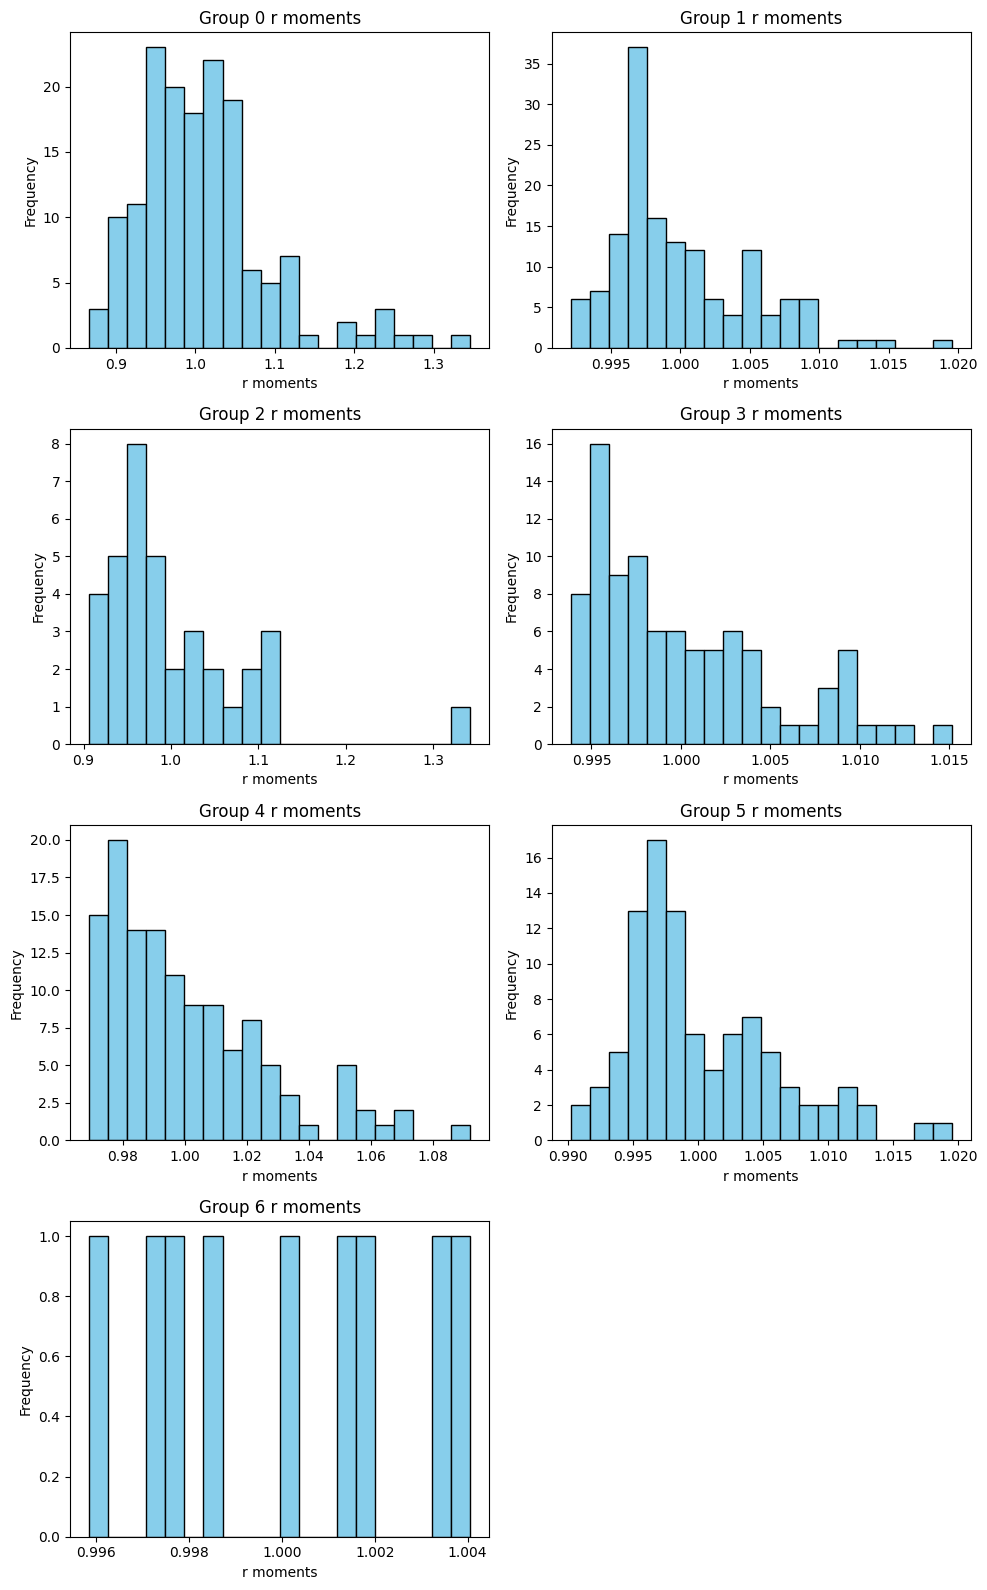

In [8]:
import matplotlib.pyplot as plt

# Assuming 'ds' is your dataset object with attributes like 'K', 'z_vars', 'normed_embds', 'r_vars'

group_r = [[] for _ in range(ds.K)]

for i, z_var in enumerate(ds.z_vars):
    normed_embd = ds.normed_embds[i]
    group = np.argmax(z_var.probs)
    r_i_moment = ds.r_vars[i].first_moment
    group_r[group].append(r_i_moment)  # Correctly append r_i_moment to specific group list

# Determine the layout of the subplots
num_rows = int(np.ceil(len(group_r) / 2))  # Using two columns, adjust as necessary
num_cols = 2 if len(group_r) > 1 else 1    # Use one column if there's only one group

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))  # Adjust overall size as needed
axs = axs.flatten()  # Flatten the array to make iteration easier

for idx, r_data in enumerate(group_r):
    axs[idx].hist(r_data, bins=20, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'Group {idx} r moments')
    axs[idx].set_xlabel('r moments')
    axs[idx].set_ylabel('Frequency')

# If there are more axes than groups, hide the extra axes
for ax in axs[len(group_r):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


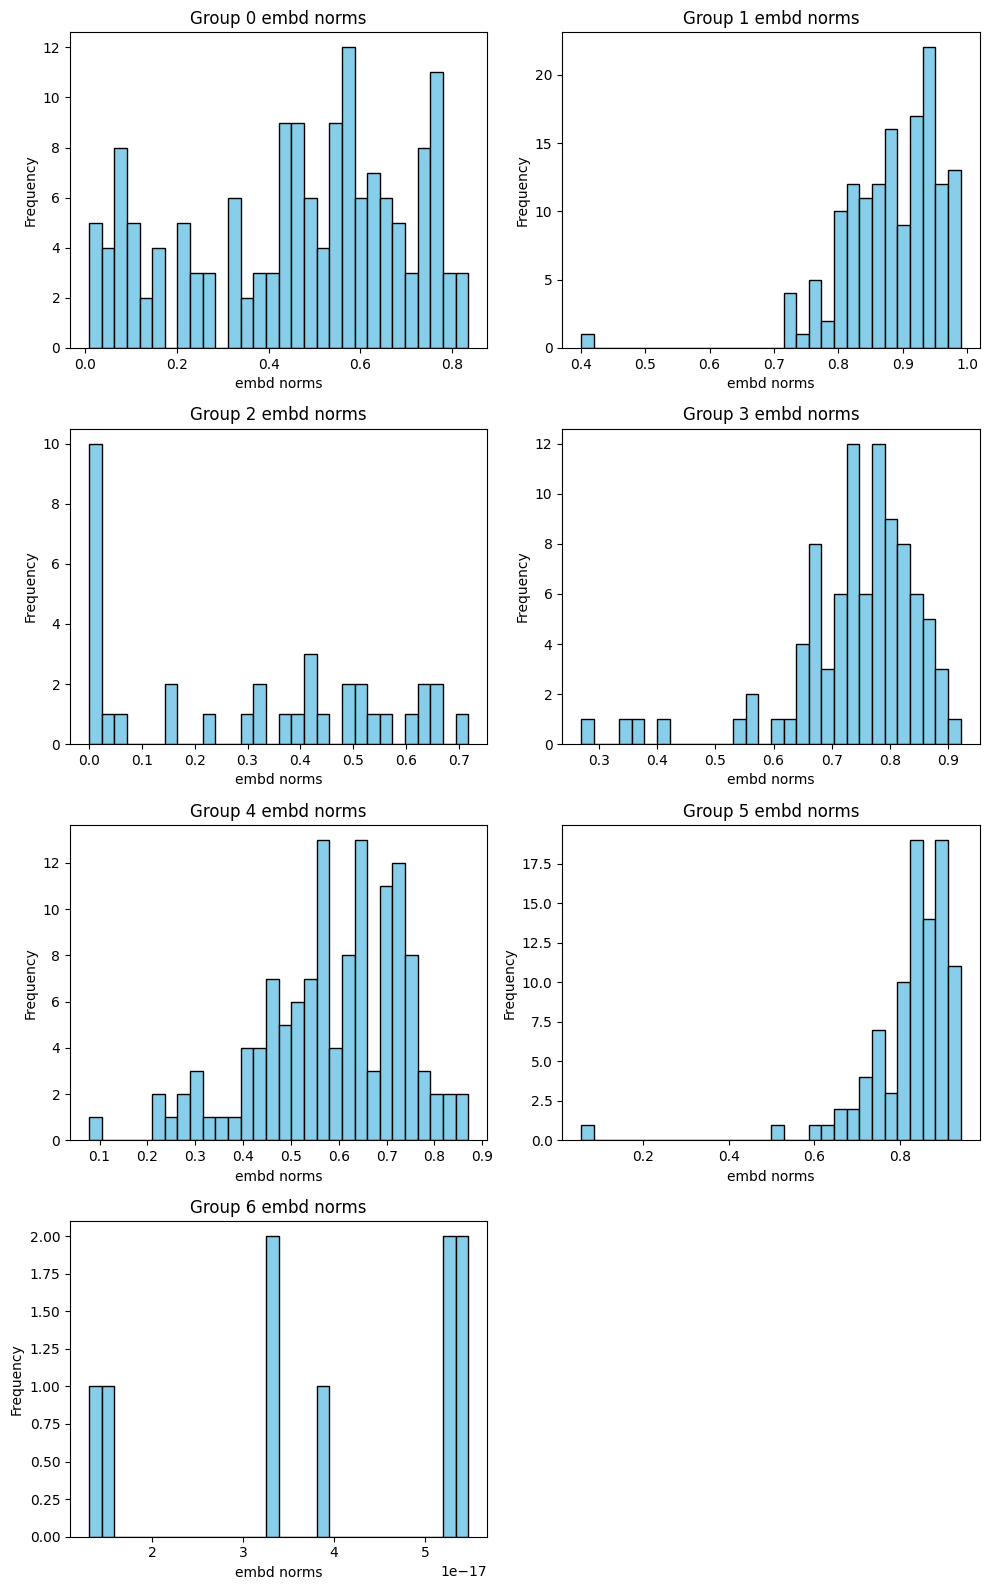

In [10]:
import matplotlib.pyplot as plt

# Assuming 'ds' is your dataset object with attributes like 'K', 'z_vars', 'normed_embds', 'r_vars'

group_norm = [[] for _ in range(ds.K)]

for i, z_var in enumerate(ds.z_vars):
    embd = ds.embds[i]
    group = np.argmax(z_var.probs)
    group_norm[group].append(np.linalg.norm(embd))  # Correctly append r_i_moment to specific group list



# Determine the layout of the subplots
num_rows = int(np.ceil(len(group_r) / 2))  # Using two columns, adjust as necessary
num_cols = 2 if len(group_r) > 1 else 1    # Use one column if there's only one group

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))  # Adjust overall size as needed
axs = axs.flatten()  # Flatten the array to make iteration easier

for idx, r_data in enumerate(group_norm):
    axs[idx].hist(r_data, bins=30, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'Group {idx} embd norms')
    axs[idx].set_xlabel('embd norms')
    axs[idx].set_ylabel('Frequency')

# If there are more axes than groups, hide the extra axes
for ax in axs[len(group_norm):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


Minimum 10 values in Group 0: [0.008300600638363482, 0.010055862950297591, 0.01831999542135668, 0.02372531885217033, 0.03134438485711409, 0.036471578888355845, 0.05458481263232091, 0.055231395519528534, 0.06237333510739084, 0.06519164217456512, 0.06859694572543676, 0.0733759062942554, 0.07632113029004715, 0.07732271476190591, 0.08348695575732548, 0.08576212177101303, 0.08773678035209308, 0.0953552852360047, 0.09712287828276915, 0.1044433297519292]
Minimum 10 values in Group 1: [0.4006649484213149, 0.715232107630125, 0.7221587469129821, 0.7254455174699251, 0.7318985512464508, 0.736621706261618, 0.7579727461441949, 0.7637312792257893, 0.771060703868997, 0.7717806484894523, 0.7734719594419477, 0.7841111008403794, 0.7844327091603049, 0.8002650203304862, 0.8016202752983385, 0.8020104767201852, 0.8024135899068382, 0.8065248753124019, 0.8080339040345491, 0.8091413916877459]
Minimum 10 values in Group 2: [2.3897038871953593e-18, 3.2392716401766214e-18, 2.704342523326237e-17, 3.6415254540718e-1

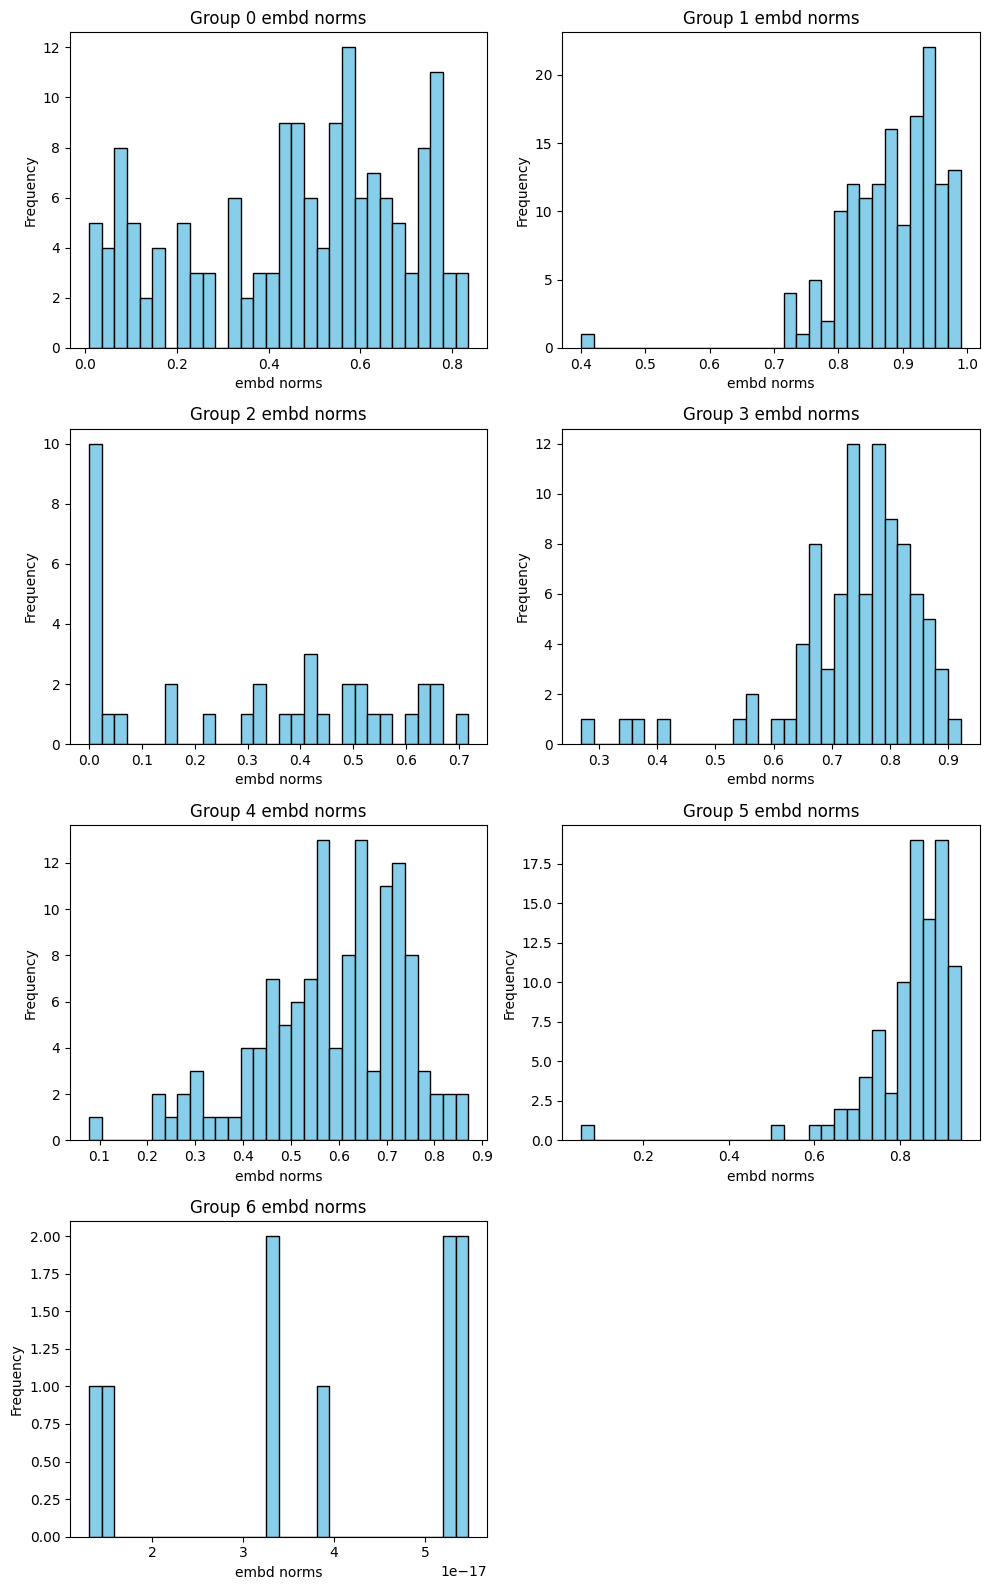

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'ds' is your dataset object with attributes like 'K', 'z_vars', 'normed_embds', 'r_vars'

group_norm = [[] for _ in range(ds.K)]

for i, z_var in enumerate(ds.z_vars):
    embd = ds.embds[i]
    group = np.argmax(z_var.probs)
    group_norm[group].append(np.linalg.norm(embd))  # Append norm of embd to specific group list

# Determine the layout of the subplots
num_rows = int(np.ceil(len(group_norm) / 2))  # Using two columns, adjust as necessary
num_cols = 2 if len(group_norm) > 1 else 1    # Use one column if there's only one group

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))  # Adjust overall size as needed
axs = axs.flatten()  # Flatten the array to make iteration easier

# Plot histograms and print minimum 10 values for each group
for idx, norms in enumerate(group_norm):
    axs[idx].hist(norms, bins=30, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'Group {idx} embd norms')
    axs[idx].set_xlabel('embd norms')
    axs[idx].set_ylabel('Frequency')
    
    # Sort norms and print the minimum 10 values
    sorted_norms = sorted(norms)
    min_ten_values = sorted_norms[:20]  # Take first 10 or fewer if there are not enough items
    print(f"Minimum 10 values in Group {idx}: {min_ten_values}")

# If there are more axes than groups, hide the extra axes
for ax in axs[len(group_norm):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'ds' is your dataset object with attributes like 'K', 'z_vars', 'normed_embds', 'r_vars'

group_norm = [[] for _ in range(ds.K)]

for i, z_var in enumerate(ds.z_vars):
    group = np.argmax(z_var.probs)
    embd = ds.embds[i]
    

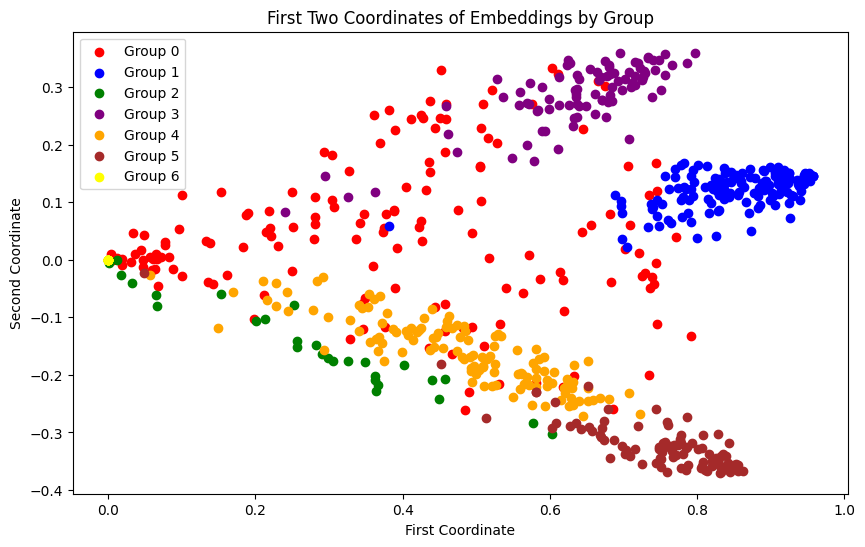

In [13]:
import matplotlib.pyplot as plt

# Assuming 'ds' is your dataset object with attributes like 'K', 'z_vars', 'embds'

# Initialize a list to hold sublists for each group, where each sublist contains embeddings' first two coordinates
group_coordinates = [[] for _ in range(ds.K)]

for i, z_var in enumerate(ds.z_vars):
    group = np.argmax(z_var.probs)
    embd = ds.embds[i]
    # Append only the first two coordinates of each embedding to the correct group
    if len(embd) >= 2:  # Check to ensure there are at least two coordinates
        group_coordinates[group].append(embd[:2])

# Plotting
fig, axs = plt.subplots(1, figsize=(10, 6))  # Single plot for simplicity

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'yellow']  # Colors for different groups

for idx, coords in enumerate(group_coordinates):
    if coords:  # Check if there are any coordinates to plot for this group
        # Unpack coordinates for plotting
        x_coords, y_coords = zip(*coords)
        axs.scatter(x_coords, y_coords, color=colors[idx % len(colors)], label=f'Group {idx}')

axs.legend()
axs.set_title('First Two Coordinates of Embeddings by Group')
axs.set_xlabel('First Coordinate')
axs.set_ylabel('Second Coordinate')
plt.show()
